<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
# Restart kernel after installing this
!conda install -c conda-forge imbalanced-learn

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mkl-2019.4                 |              243       204.1 MB
    joblib-0.16.0              |             py_0         203 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          15 KB  conda-forge
    scikit-learn-0.23.1        |   py36h423224d_0         6.9 MB
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    mkl-service-2.3.0          |   py36h516909a_0          64 KB  conda-forge
    ca-certificates-2020.6.20  |

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-07-12 05:08:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-07-12 05:08:37 (15.2 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

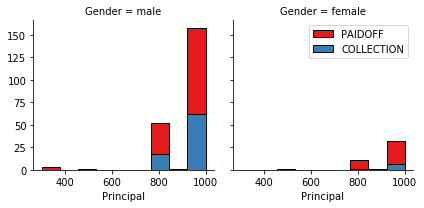

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

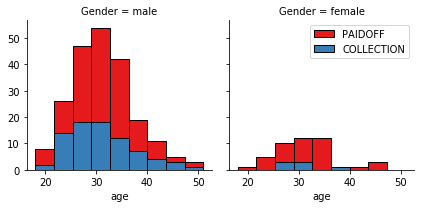

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

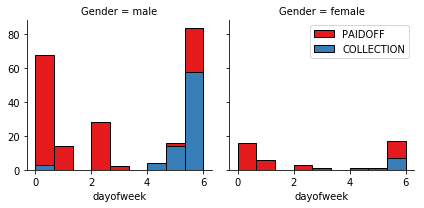

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


### Feature selection

Lets defind feature sets, X:

In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


What are our lables?

In [19]:
y = df['loan_status'].values
y[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

## Oversampling to balance classes

In [21]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [22]:
counter = Counter(y)
print(counter)

Counter({'PAIDOFF': 260, 'COLLECTION': 86})


In [23]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [24]:
counter = Counter(y)
print(counter)

Counter({'PAIDOFF': 260, 'COLLECTION': 260})


## Test Train Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (416, 9) (416,)
Test set: (104, 9) (104,)


In [26]:
# Checking if the distribution is not too varied between train and test sets

print (np.sum(y_train == "PAIDOFF") / y_train.shape[0])
print (np.sum(y_test == "PAIDOFF") / y_test.shape[0])

0.5072115384615384
0.47115384615384615


In [27]:
standard_scaler = preprocessing.StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

standard_scaler_final = preprocessing.StandardScaler()
X = standard_scaler_final.fit_transform(X)

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [33]:
# iterating over all K's from 1 to 10 to find best K

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.f1_score(y_test, yhat, pos_label="PAIDOFF")

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.72527473, 0.70731707, 0.7173913 , 0.72093023, 0.73684211,
       0.68181818, 0.71578947, 0.71111111, 0.70967742])

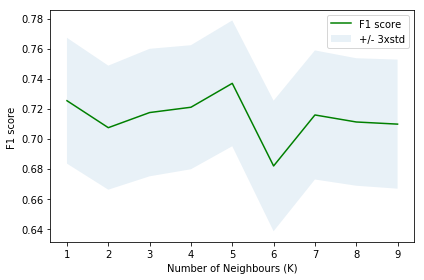

In [34]:
# Plotting the accuracy achieved with all K's to find best K

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('F1 score ', '+/- 3xstd'))
plt.ylabel('F1 score ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [35]:
# Runnning the best selected model

k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X,y)

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [37]:
parameters = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [3, 4, 5, 6, 7, 8, 10],
}

best_parameter = []
maxacc = 0

for c in parameters["criterion"]:
    for s in parameters["splitter"]:
        for m in parameters["max_depth"]:
            decTree = DecisionTreeClassifier(criterion=c, max_depth=m, splitter=s)
            decTree.fit(X_train, y_train)
            predTree = decTree.predict(X_test)
            curacc = metrics.f1_score(y_test, predTree, pos_label="PAIDOFF")
            
            if (curacc > maxacc):
                best_parameter = [c, s, m]
                maxacc = curacc

print("Max acc :", maxacc)
print("Best parameters :", best_parameter)

Max acc : 0.7391304347826086
Best parameters : ['entropy', 'random', 6]


In [38]:
decTree = DecisionTreeClassifier(criterion=best_parameter[0], max_depth=best_parameter[2], splitter=best_parameter[1])
decTree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='random')

# Support Vector Machine

In [62]:
from sklearn import svm
from sklearn import metrics

In [63]:
parameters = {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "tol" : [1e-2, 1e-3, 1e-4, 1e-5],
}

best_parameter = []
maxacc = 0

for k in parameters["kernel"]:
    for t in parameters["tol"]:
        svmclf = svm.SVC(kernel=k, tol=t)
        svmclf.fit(X_train, y_train)
        predsvm = svmclf.predict(X_test)
        curacc = metrics.f1_score(y_test, predsvm, pos_label="PAIDOFF")

        if (curacc > maxacc):
            best_parameter = [k, t]
            maxacc = curacc

print("Max acc :", maxacc)
print("Best parameters :", best_parameter)

Max acc : 0.711111111111111
Best parameters : ['rbf', 0.01]


In [64]:
svmclf = svm.SVC(kernel=best_parameter[0], tol=best_parameter[1])
svmclf.fit(X, y)

SVC(tol=0.01)

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [79]:
parameters = {
    "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "C" : [0.01, 0.1, 1, 4, 10],
}

best_parameter = []
maxacc = 0

for s in parameters["solver"]:
    for c in parameters["C"]:
        lr = LogisticRegression(C=c, solver=s, max_iter=1000)
        lr.fit(X_train, y_train)
        predlr = lr.predict(X_test)
        curacc = metrics.f1_score(y_test, predlr, pos_label="PAIDOFF")

        if (curacc > maxacc):
            best_parameter = [s, c]
            maxacc = curacc

print("Max acc :", maxacc)
print("Best parameters :", best_parameter)

Max acc : 0.7472527472527472
Best parameters : ['newton-cg', 1]


In [81]:
lr = LogisticRegression(C=best_parameter[1], solver=best_parameter[0], max_iter=1000)
lr.fit(X, y)

LogisticRegression(C=1, max_iter=1000, solver='newton-cg')

# Model Evaluation using Test set

In [39]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [40]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-07-12 05:10:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-07-12 05:10:57 (279 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [41]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [42]:
# Performing the same transformations on the test set as the train set

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)

In [43]:
# Making the test feature set (XTEST)

XTEST = Feature
XTEST[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,50,1,0,1,0,0,0
1,300,7,35,0,1,0,0,1,0
2,1000,30,43,1,1,0,1,0,0
3,1000,30,26,0,1,0,0,0,1
4,800,15,29,0,1,1,0,0,0


In [44]:
# Making the test target set (yTEST)

yTEST = test_df['loan_status'].values
yTEST[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [45]:
XTEST = standard_scaler_final.transform(XTEST)

### Model Evaluations

In [46]:
# KNN model evaluation

yhat_knn = neigh.predict(XTEST)

print("Jaccard Similarity Score for KNN :", jaccard_score(yTEST, yhat_knn, pos_label="PAIDOFF"))
print("F1 Score for KNN :", f1_score(yTEST, yhat_knn, pos_label="PAIDOFF"))

Jaccard Similarity Score for KNN : 0.7083333333333334
F1 Score for KNN : 0.8292682926829269


In [47]:
# Decision Tree Model evaluation

yhat_dectree = decTree.predict(XTEST)

print("Jaccard Similarity Score for Dec Tree :", jaccard_score(yTEST, yhat_dectree, pos_label="PAIDOFF"))
print("F1 Score for Dec Tree :", f1_score(yTEST, yhat_dectree, pos_label="PAIDOFF"))

Jaccard Similarity Score for Dec Tree : 0.6666666666666666
F1 Score for Dec Tree : 0.8000000000000002


In [65]:
# SVM Model evaluation

yhat_svm = svmclf.predict(XTEST)

print("Jaccard Similarity Score for SVM :", jaccard_score(yTEST, yhat_svm, pos_label="PAIDOFF"))
print("F1 Score for SVM :", f1_score(yTEST, yhat_svm, pos_label="PAIDOFF"))

Jaccard Similarity Score for SVM : 0.6739130434782609
F1 Score for SVM : 0.8051948051948051


In [86]:
# Logistic Regression Model evaluation

yhat_lr = lr.predict(XTEST)
yhat_lr_prob = lr.predict_proba(XTEST)

print("Jaccard Similarity Score for Logistic Regression :", jaccard_score(yTEST, yhat_lr, pos_label="PAIDOFF"))
print("F1 Score for Logistic Regression :", f1_score(yTEST, yhat_lr, pos_label="PAIDOFF"))
print("Logloss Score for Logistic Regression :", log_loss(yTEST, yhat_lr_prob))

Jaccard Similarity Score for Logistic Regression : 0.6382978723404256
F1 Score for Logistic Regression : 0.7792207792207791
Logloss Score for Logistic Regression : 0.4821417971208988


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

### Methods used to achieve better scores

<span style="color:green">
1. Used the "imblearn" library to perform oversampling of the dateaet to remove the class imbalance present.
    <br>
2. Uses the SMOTE algorithm to balance the classes equally
    <br>
3. Performed a Train-Validation split on the training data to get the best set of parameters for each type of classifier. Then, presented the results on the unseen Test dataset to remove overfitting.
</span>

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.71    | 0.83     | NA      |
| Decision Tree      | 0.67    | 0.80     | NA      |
| SVM                | 0.67    | 0.81     | NA      |
| LogisticRegression | 0.64    | 0.78     | 0.48    |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>